In [261]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 100)


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 


# Plot configuration

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 


# Read data
df = pd.read_csv(r'C:\Users\Ethan\Documents\Portfolio\Data Projects\Python\Movie Industry\movies.csv')

In [262]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [263]:
# Check for missing data 

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [199]:
# Drop rows with null values

df = df.dropna(how='any',axis=0)

In [200]:
# Data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [201]:
# Change data type

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [202]:
# Get year from release date by splttiing on delimters

new = df['released'].str.split(',',expand=True)

new = new[1].dropna(how='any',axis = 0)

new = new.str.split('(',expand= True)

new = new[0]

# Remove white spaces 

new = new.str.replace(" ","")

# Add year to main df

df['yearcorrect'] = new

In [252]:
# Order by gross value descending
df.sort_values(by=['gross'], inplace = False, ascending= False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38


In [264]:
# Drop any dubplicates 

df = df.drop_duplicates()

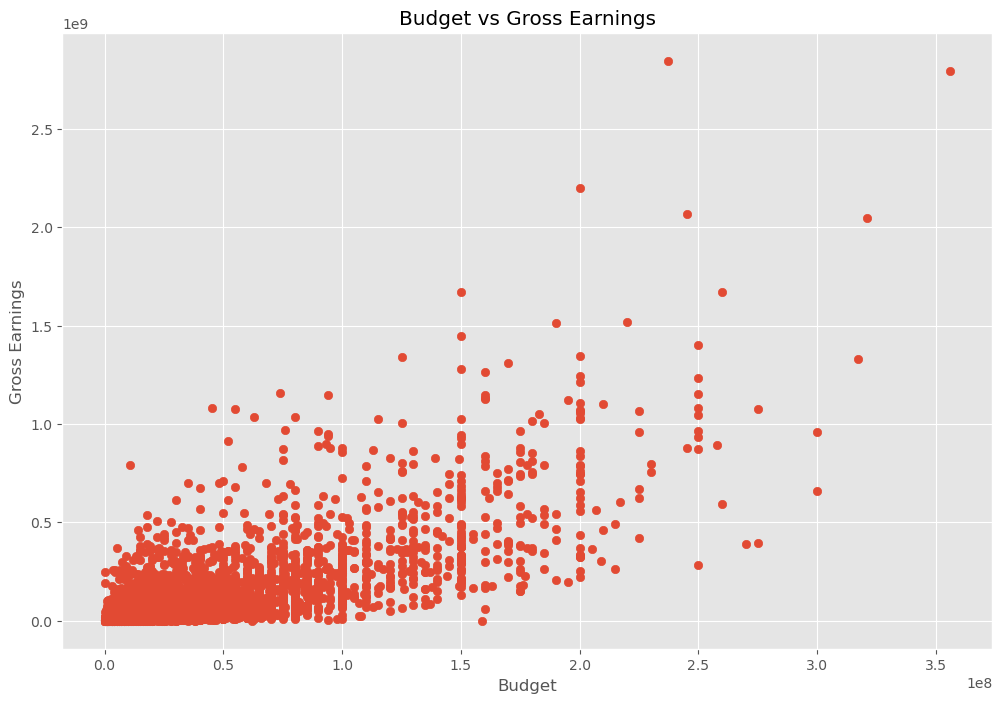

In [208]:
# Finding correlation between budget and gross


# Scatter plot ( budget vs gross )

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

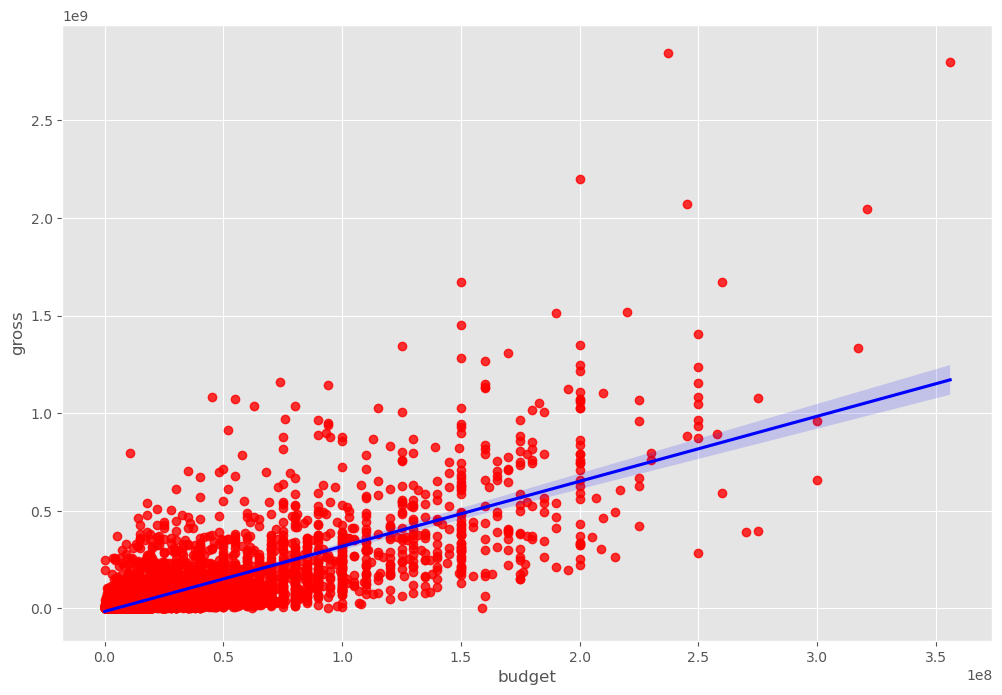

In [216]:
# Plot budget vs gross using Seaborn


sns.regplot(x='budget',y='gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [223]:
# Correlation values
# Pearson, Kendall, Spearman

print("Pearson")
print(df.corr(method='pearson'))
print()

print("Kendall")
print(df.corr(method='kendall'))
print()

print("Spearman")
print(df.corr(method='spearman'))
print()


Pearson
             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

Kendall
             year     score     votes    budget     gross   runtime
year     1.000000  0.039389  0.296512  0.220833  0.239539  0.064824
score    0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254
votes    0.296512  0.350185  1.000000  0.346274  0.553625  0.205344
budget   0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278
gross    0.239539  0.124943  0.553625  0.512057  1.000000  0.176979
runtime  0.064824  0.292254  0.205344  0.231278  0.176979  1.000000

Spearman
             year    

C:\Users\Ethan\AppData\Local\Temp\ipykernel_6988\3461148744.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method='pearson'))
C:\Users\Ethan\AppData\Local\Temp\ipykernel_6988\3461148744.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method='kendall'))
C:\Users\Ethan\AppData\Local\Temp\ipykernel_6988\3461148744.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr(method='spearman'))


C:\Users\Ethan\AppData\Local\Temp\ipykernel_6988\3420613217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


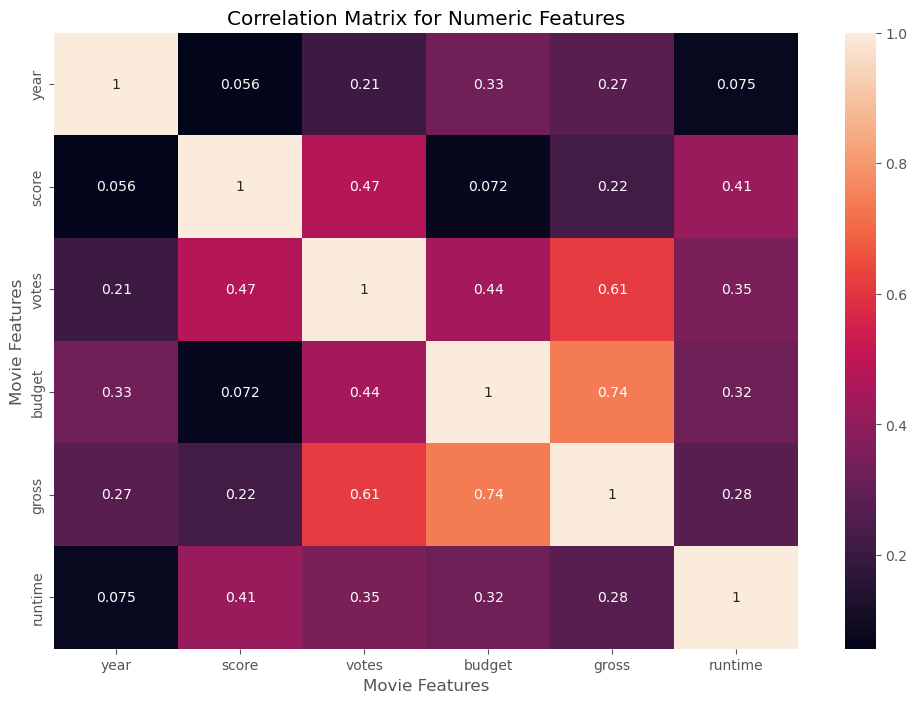

In [225]:
corr_matrix = df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()



In [253]:
# Taking company into consideration 

df_numerized = df 

for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col]= df_numerized[col].astype('category')
        df_numerized[col]= df_numerized[col].cat.codes
        

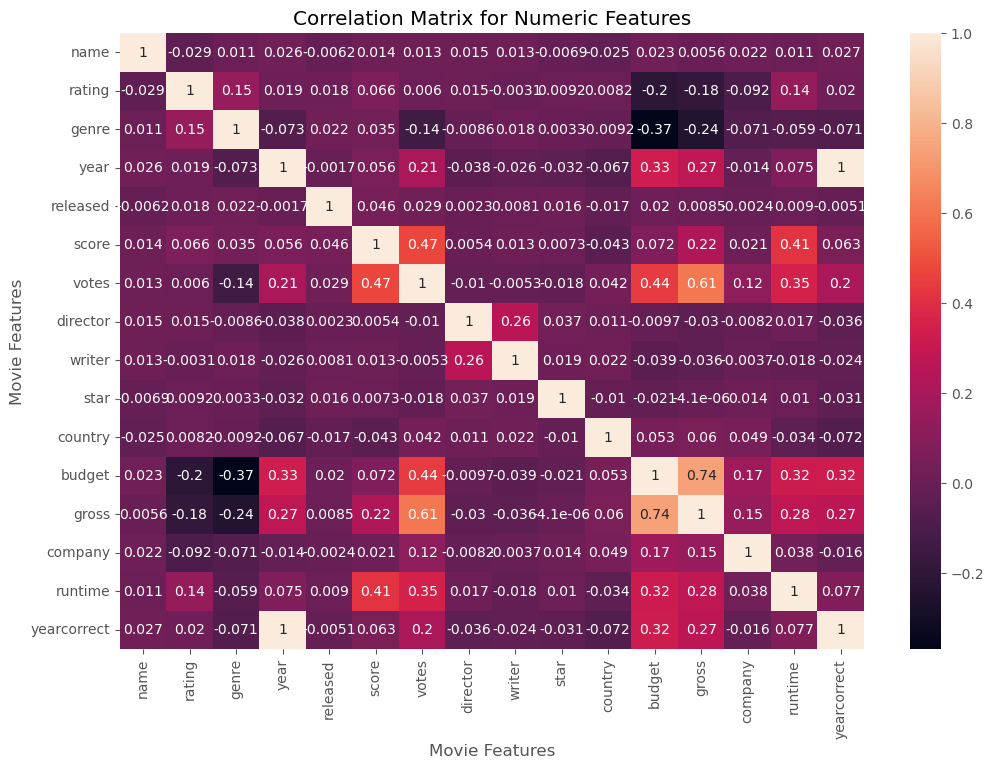

In [254]:
# Heatmap based on Company

corr_matrix = df_numerized.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [250]:
correlation_maxtrix = df_numerized.corr(method='pearson')

corr_pairs = correlation_maxtrix.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs)> 0.5]

In [251]:
high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.996723
year         yearcorrect    0.996723
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64